# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [32]:
import numpy as np
import pandas as pd
import tensorflow as tp
from keras.models import Sequential
from keras.layers import Dense




In [33]:
df = pd.read_csv('compresive_strength_concrete.csv')
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [34]:
df.shape

(1030, 9)

In [35]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [36]:
df.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [37]:
df['Age (day)']=df['Age (day)'].astype('float64')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30


In [38]:
df.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                float64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [39]:
df['Concrete compressive strength(MPa, megapascals) ']


0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Concrete compressive strength(MPa, megapascals) , Length: 1030, dtype: float64

(array([ 45., 133., 156., 181., 196., 112., 100.,  52.,  36.,  19.]),
 array([ 2.33 , 10.357, 18.384, 26.411, 34.438, 42.465, 50.492, 58.519,
        66.546, 74.573, 82.6  ]),
 <BarContainer object of 10 artists>)

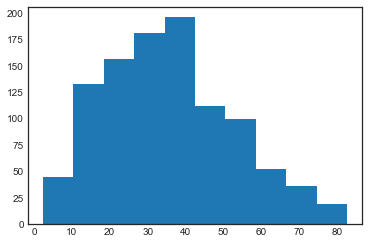

In [40]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

plt.hist(df['Concrete compressive strength(MPa, megapascals) '])


# Splitting data:

In [41]:
train_data= df.iloc[:515,:8]
train_label=df.iloc[:515,8]

test_data=df.iloc[515:824,:8]
test_label=df.iloc[515:824,8]

val_data=df.iloc[824:,:8]
val_label=df.iloc[824:,:8]

train_data.shape , train_label.shape , test_data.shape , test_label.shape , val_data.shape , val_label.shape

((515, 8), (515,), (309, 8), (309,), (206, 8), (206, 8))

In [42]:
train_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0


In [43]:
train_label

0      79.99
1      61.89
2      40.27
3      41.05
4      44.30
       ...  
510    39.00
511    65.70
512    32.11
513    40.29
514    74.36
Name: Concrete compressive strength(MPa, megapascals) , Length: 515, dtype: float64

In [44]:
#Stadarization
mean = np.mean(train_data)
std = np.std(train_data)


train_data -= mean
train_data /= std

val_data -= mean
val_data /= std

test_data -= mean
test_data /= std

In [45]:
train_data.tail()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
510,1.208336,-0.554527,0.991494,0.174213,-0.020163,-2.134066,-0.338208,-0.663018
511,1.208336,-0.554527,0.991494,0.174213,-0.020163,-2.134066,-0.338208,0.046475
512,1.208336,-0.554527,0.991494,-0.231061,0.047596,-2.134066,-0.338208,-0.720936
513,1.208336,-0.554527,0.991494,-0.231061,0.047596,-2.134066,-0.338208,-0.663018
514,1.208336,-0.554527,0.991494,-0.231061,0.047596,-2.134066,-0.338208,0.046475


In [46]:
test_data.tail()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
819,2.175650,-0.84436,-1.115667,0.620014,-1.460049,1.956593,-1.930310,0.538776
820,2.175650,-0.84436,-1.115667,0.620014,-1.460049,1.956593,-1.930310,3.145077
821,0.231443,-0.84436,-1.115667,1.187397,-1.460049,-0.081986,0.242851,-0.561662
822,0.231443,-0.84436,-1.115667,1.187397,-1.460049,-0.081986,0.242851,-0.358950
823,0.231443,-0.84436,-1.115667,1.187397,-1.460049,-0.081986,0.242851,1.841926


In [47]:
val_data.tail()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
1025,-0.205285,0.683849,0.325823,0.239056,0.047596,-1.484691,-0.125540,-0.35895
1026,0.233359,-0.844360,0.729695,0.903705,0.301694,-2.189418,0.398575,-0.35895
1027,-1.430231,0.992126,0.617952,0.769965,-0.426719,-1.183629,0.010427,-0.35895
1028,-1.328711,1.615266,-1.115667,0.076947,0.454152,0.128622,0.113856,-0.35895
1029,-0.353734,0.479649,0.134263,1.090131,-0.003224,-1.560294,-0.204564,-0.35895


# Model

In [114]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [115]:
model = build_model()
model.fit(train_data, train_label,epochs=100, batch_size=1, verbose=0)
mse , mae = model.evaluate(val_data, val_label, verbose=0)
mae

263.41485595703125

# Over-fitting

# Epoch

In [19]:
model = build_model()
history = model.fit(train_data, train_label,epochs=500, batch_size=16, verbose=0,validation_data=(val_data, val_label))

In [20]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [21]:
train_loss = history.history['mae']
val_loss = history.history['val_mae']
epochs= range(500)

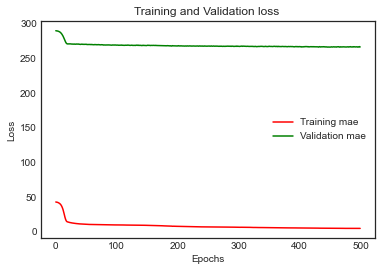

In [22]:
plt.plot(epochs, train_loss, 'r', label='Training mae')
plt.plot(epochs, val_loss, 'g', label='Validation mae')
plt.title('Training and Validation loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

it appears after a few epochs, the mae loss becomes constant

# No. of Layers & Memory Capacity

In [122]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(14, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(4, activation='relu'))
    model.add(layers.Dense(4, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [123]:
model = build_model()
model.fit(train_data, train_label,epochs=100, batch_size=1, verbose=0)
mse , mae = model.evaluate(val_data, val_label, verbose=0)
mae

265.8184814453125

8-8-6= 267.6055908203125

10-6= 267.1843566894531


10-4-4= 266.9336242675781


10-6-4= 265.1640930175781


14-4-4=264.3193664550781  #best one so far


14-8-6=265.1615905761719

# activation function

In [91]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='tanh',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(8, activation='tanh'))
    model.add(layers.Dense(6, activation='tanh'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [92]:
model = build_model()
model.fit(train_data, train_label,epochs=100, batch_size=1, verbose=0)
mse , mae = model.evaluate(val_data, val_label, verbose=0)
mae

266.0728454589844

14-4-4=266.08599853515625

so no need of changing the activation function

# Regulizer

In [128]:
from keras import regularizers
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(14, kernel_regularizer=regularizers.l2(0.001), activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(4, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(layers.Dense(4, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [129]:
model = build_model()
model.fit(train_data, train_label,epochs=100, batch_size=1, verbose=0)
mse , mae = model.evaluate(val_data, val_label, verbose=0)
mae

268.10162353515625

 l2(0.001)=264.28607177734375

l1(0.001)=266.1231689453125


# Dropout

In [145]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(14, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(4, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(4, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [109]:
model = build_model()
model.fit(train_data, train_label,epochs=100, batch_size=1, verbose=0)
mse , mae = model.evaluate(val_data, val_label, verbose=0)
mae

268.2809753417969

Dropout(0.5)=268.9576721191406

Dropout(0.2)=268.2809753417969

# Evaluation

In [148]:
from keras import regularizers
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10, kernel_regularizer=regularizers.l2(0.001), activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(layers.Dense(6, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [149]:
model = build_model()
model.fit(train_data, train_label,epochs=100, batch_size=1, verbose=0)
mse , mae = model.evaluate(val_data, val_label, verbose=0)
mae

264.6249084472656

# Prediction

In [150]:
predictions = model.predict(test_data)

In [151]:
predictions.shape

(309, 1)

In [152]:
output_df = pd.DataFrame({'Actual': test_label, 'Prediction': np.round(predictions.reshape(309))})

In [153]:
output_df

,Actual,Prediction
515,21.97,28.0
516,9.85,17.0
517,15.07,17.0
518,23.25,32.0
519,43.73,49.0
...,...,...
819,58.78,59.0
820,67.11,67.0
821,20.77,21.0
822,25.18,31.0
